# Creating Cohorts of Songs

## Data Dictionary

| Variable	|   Description |
| ----------- | ----------- |
| name	|   the name of the song |
| album	|   the name of the album |
| release_date	|   the day month and year the album was released |
| track number	|   the order the song appears on the album |
| id	|   the Spotify id for the song |
| uri	|   the Spotify uri for the song |
| acousticness	|   A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic. |
| danceability	|   Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable. |
| energy	|   Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy. |
| instrumentalness	|   Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0. |
| liveness	|   Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live. |
| loudness	|   The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typically range between -60 and 0 db. |
| speechiness	|   detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks. |
| tempo	|   The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration. |
| valence	|   A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry). |
| popularity	|   the popularity of the song from 0 to 100 |
| duration_ms	|   The duration of the track in milliseconds. |

In [141]:
# Import libraries

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

## Initial data inspection and data cleaning:
- Examine the data initially to identify duplicates, missing values, irrelevant entries, or outliers. Check for any instances of erroneous entries and rectify them as needed

In [142]:
df = pd.read_csv('rolling_stones_spotify.csv')
df.head()

,Unnamed: 0,name,album,release_date,track_number,id,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
0,0,Concert Intro Music - Live,Licked Live In NYC,2022-06-10,1,2IEkywLJ4ykbhi1yRQvmsT,spotify:track:2IEkywLJ4ykbhi1yRQvmsT,0.0824,0.463,0.993,0.996000,0.932,-12.913,0.1100,118.001,0.0302,33,48640
1,1,Street Fighting Man - Live,Licked Live In NYC,2022-06-10,2,6GVgVJBKkGJoRfarYRvGTU,spotify:track:6GVgVJBKkGJoRfarYRvGTU,0.4370,0.326,0.965,0.233000,0.961,-4.803,0.0759,131.455,0.3180,34,253173
2,2,Start Me Up - Live,Licked Live In NYC,2022-06-10,3,1Lu761pZ0dBTGpzxaQoZNW,spotify:track:1Lu761pZ0dBTGpzxaQoZNW,0.4160,0.386,0.969,0.400000,0.956,-4.936,0.1150,130.066,0.3130,34,263160
3,3,If You Can't Rock Me - Live,Licked Live In NYC,2022-06-10,4,1agTQzOTUnGNggyckEqiDH,spotify:track:1agTQzOTUnGNggyckEqiDH,0.5670,0.369,0.985,0.000107,0.895,-5.535,0.1930,132.994,0.1470,32,305880
4,4,Don’t Stop - Live,Licked Live In NYC,2022-06-10,5,7piGJR8YndQBQWVXv6KtQw,spotify:track:7piGJR8YndQBQWVXv6KtQw,0.4000,0.303,0.969,0.055900,0.966,-5.098,0.0930,130.533,0.2060,32,305106


### Observation
On first look, there is an Unnamed column that appears to mimic the index but is not needed. Drop this column.

In [143]:
df.drop(columns='Unnamed: 0', axis=1, inplace=True)
df.head()

,name,album,release_date,track_number,id,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
0,Concert Intro Music - Live,Licked Live In NYC,2022-06-10,1,2IEkywLJ4ykbhi1yRQvmsT,spotify:track:2IEkywLJ4ykbhi1yRQvmsT,0.0824,0.463,0.993,0.996000,0.932,-12.913,0.1100,118.001,0.0302,33,48640
1,Street Fighting Man - Live,Licked Live In NYC,2022-06-10,2,6GVgVJBKkGJoRfarYRvGTU,spotify:track:6GVgVJBKkGJoRfarYRvGTU,0.4370,0.326,0.965,0.233000,0.961,-4.803,0.0759,131.455,0.3180,34,253173
2,Start Me Up - Live,Licked Live In NYC,2022-06-10,3,1Lu761pZ0dBTGpzxaQoZNW,spotify:track:1Lu761pZ0dBTGpzxaQoZNW,0.4160,0.386,0.969,0.400000,0.956,-4.936,0.1150,130.066,0.3130,34,263160
3,If You Can't Rock Me - Live,Licked Live In NYC,2022-06-10,4,1agTQzOTUnGNggyckEqiDH,spotify:track:1agTQzOTUnGNggyckEqiDH,0.5670,0.369,0.985,0.000107,0.895,-5.535,0.1930,132.994,0.1470,32,305880
4,Don’t Stop - Live,Licked Live In NYC,2022-06-10,5,7piGJR8YndQBQWVXv6KtQw,spotify:track:7piGJR8YndQBQWVXv6KtQw,0.4000,0.303,0.969,0.055900,0.966,-5.098,0.0930,130.533,0.2060,32,305106


In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1610 entries, 0 to 1609
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              1610 non-null   object 
 1   album             1610 non-null   object 
 2   release_date      1610 non-null   object 
 3   track_number      1610 non-null   int64  
 4   id                1610 non-null   object 
 5   uri               1610 non-null   object 
 6   acousticness      1610 non-null   float64
 7   danceability      1610 non-null   float64
 8   energy            1610 non-null   float64
 9   instrumentalness  1610 non-null   float64
 10  liveness          1610 non-null   float64
 11  loudness          1610 non-null   float64
 12  speechiness       1610 non-null   float64
 13  tempo             1610 non-null   float64
 14  valence           1610 non-null   float64
 15  popularity        1610 non-null   int64  
 16  duration_ms       1610 non-null   int64  


### Observation
- There are no null values
- Columns 'name', 'album', 'releasedate', 'id' and 'uri' are objects; the rest are float64 or in64

In [145]:
df.shape

(1610, 17)

### Observation

- There are 1610 rowas and 17 columns

In [146]:
df['album'].value_counts()

album
Voodoo Lounge Uncut (Live)                                   56
Honk (Deluxe)                                                47
Live Licks                                                   46
Tattoo You (Super Deluxe)                                    46
Some Girls (Deluxe Version)                                  44
                                                             ..
Beggars Banquet (50th Anniversary Edition)                   10
Let It Bleed (50th Anniversary Edition / Remastered 2019)     9
Black And Blue                                                8
Black And Blue (Remastered 2009)                              8
Jamming With Edward                                           6
Name: count, Length: 90, dtype: int64

In [147]:
print(df.duplicated().sum())

0


### Observations
- The album 'Voodoo Lounge Uncut (Live)' has the most tracks at 56; 'Jamming with Edward' has the least at 6
- There are no duplicates in this dataset

In [148]:
df.columns

Index(['name', 'album', 'release_date', 'track_number', 'id', 'uri',
       'acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'popularity',
       'duration_ms'],
      dtype='object')

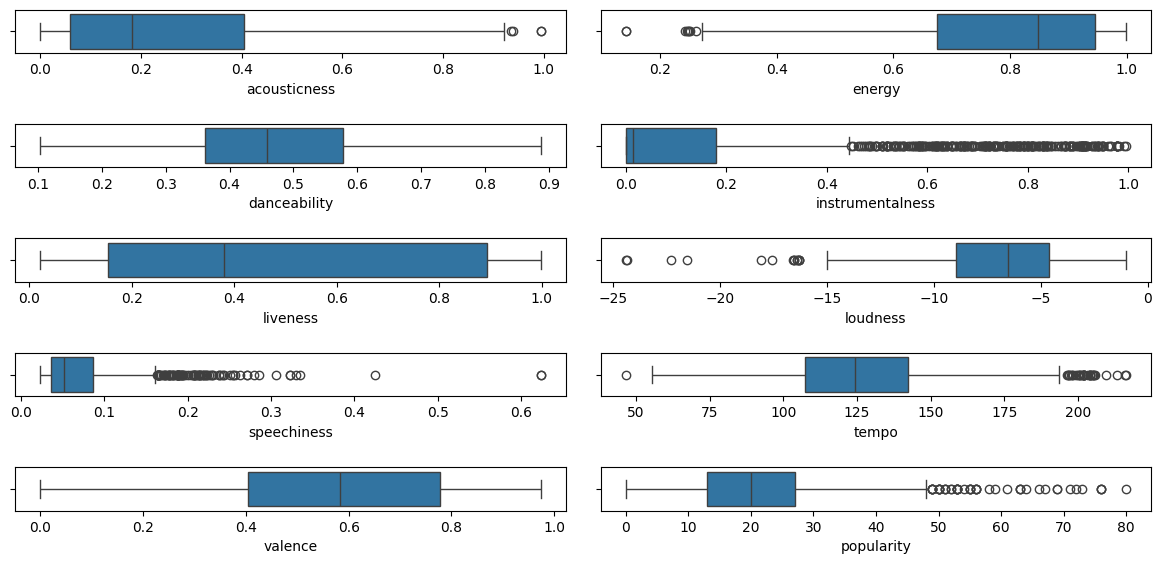

In [149]:
fig, axs = plt.subplots(ncols=2,nrows=5,figsize=(12,6))
sns.boxplot(x='acousticness',data=df,ax=axs[0,0])
sns.boxplot(x='energy',data=df,ax=axs[0,1])
sns.boxplot(x='danceability',data=df,ax=axs[1,0])
sns.boxplot(x='instrumentalness',data=df,ax=axs[1,1])
sns.boxplot(x='liveness',data=df,ax=axs[2,0])
sns.boxplot(x='loudness',data=df,ax=axs[2,1])
sns.boxplot(x='speechiness',data=df,ax=axs[3,0])
sns.boxplot(x='tempo',data=df,ax=axs[3,1])
sns.boxplot(x='valence',data=df,ax=axs[4,0])
sns.boxplot(x='popularity',data=df,ax=axs[4,1])

plt.tight_layout(pad=2)

In [150]:
df_sorted = df.sort_values(by=['popularity'], ascending=False)
df_sorted[['name', 'album', 'popularity']].head(20)

,name,album,popularity
1403,"Paint It, Black",Aftermath,80
1248,Gimme Shelter,Let It Bleed,76
1472,(I Can't Get No) Satisfaction - Mono Version,Out Of Our Heads,76
862,Start Me Up - Remastered 2009,Tattoo You (2009 Re-Mastered),76
1257,Sympathy For The Devil - 50th Anniversary Edition,Beggars Banquet (50th Anniversary Edition),73
901,Beast Of Burden - Remastered 1994,Some Girls,72
1023,Angie,Goats Head Soup (Remastered 2009),71
893,Miss You - Remastered,Some Girls,69
1122,Wild Horses - 2009 Mix,Sticky Fingers (Remastered),69
1256,You Can't Always Get What You Want,Let It Bleed,67


### Observations
- There are a lot of outliers for the features 'intrumentalness', 'speechiness', and 'popularity'
- 'Paint It, Black' is the most popular song
- Features 'id', and 'uri' can be dropped since they will not have baring on 'popularity'

## Refine the data for further processing based on your findings

In [151]:
# drop 'id' and 'uri' as these features don't impact popularity
df.drop(columns=['id', 'uri'], inplace=True)
df

,name,album,release_date,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
0,Concert Intro Music - Live,Licked Live In NYC,2022-06-10,1,0.0824,0.463,0.993,0.996000,0.9320,-12.913,0.1100,118.001,0.0302,33,48640
1,Street Fighting Man - Live,Licked Live In NYC,2022-06-10,2,0.4370,0.326,0.965,0.233000,0.9610,-4.803,0.0759,131.455,0.3180,34,253173
2,Start Me Up - Live,Licked Live In NYC,2022-06-10,3,0.4160,0.386,0.969,0.400000,0.9560,-4.936,0.1150,130.066,0.3130,34,263160
3,If You Can't Rock Me - Live,Licked Live In NYC,2022-06-10,4,0.5670,0.369,0.985,0.000107,0.8950,-5.535,0.1930,132.994,0.1470,32,305880
4,Don’t Stop - Live,Licked Live In NYC,2022-06-10,5,0.4000,0.303,0.969,0.055900,0.9660,-5.098,0.0930,130.533,0.2060,32,305106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1605,Carol,The Rolling Stones,1964-04-16,8,0.1570,0.466,0.932,0.006170,0.3240,-9.214,0.0429,177.340,0.9670,39,154080
1606,Tell Me,The Rolling Stones,1964-04-16,9,0.0576,0.509,0.706,0.000002,0.5160,-9.427,0.0843,122.015,0.4460,36,245266
1607,Can I Get A Witness,The Rolling Stones,1964-04-16,10,0.3710,0.790,0.774,0.000000,0.0669,-7.961,0.0720,97.035,0.8350,30,176080
1608,You Can Make It If You Try,The Rolling Stones,1964-04-16,11,0.2170,0.700,0.546,0.000070,0.1660,-9.567,0.0622,102.634,0.5320,27,121680


### Notes
- try removing outliers to see if there is a higher correlation without them

In [152]:
def outlier_treatment(col):
    Q1, Q3 = np.percentile(col, [25,75])

    IQR = Q3 - Q1

    lower_range = Q1 - 1.5 * IQR
    upper_range = Q3 + 1.5 * IQR

    return lower_range, upper_range

In [153]:
lower_range, upper_range = outlier_treatment(df['instrumentalness'])

In [154]:
print('lower_range = ',lower_range, '\tupper_range = ',upper_range)

lower_range =  -0.26795187499999995 	upper_range =  0.44717112499999995


In [155]:
outlier_filter_cond = (df['instrumentalness'] > lower_range) & (df['instrumentalness'] < upper_range)
df_no_outliers = df[outlier_filter_cond]

In [156]:
print('size before outlier treatment:', df.shape)
print('size after outlier treatment:', df_no_outliers.shape)

size before outlier treatment: (1610, 15)
size after outlier treatment: (1338, 15)


Text(0.5, 1.0, 'after outlier treatment')

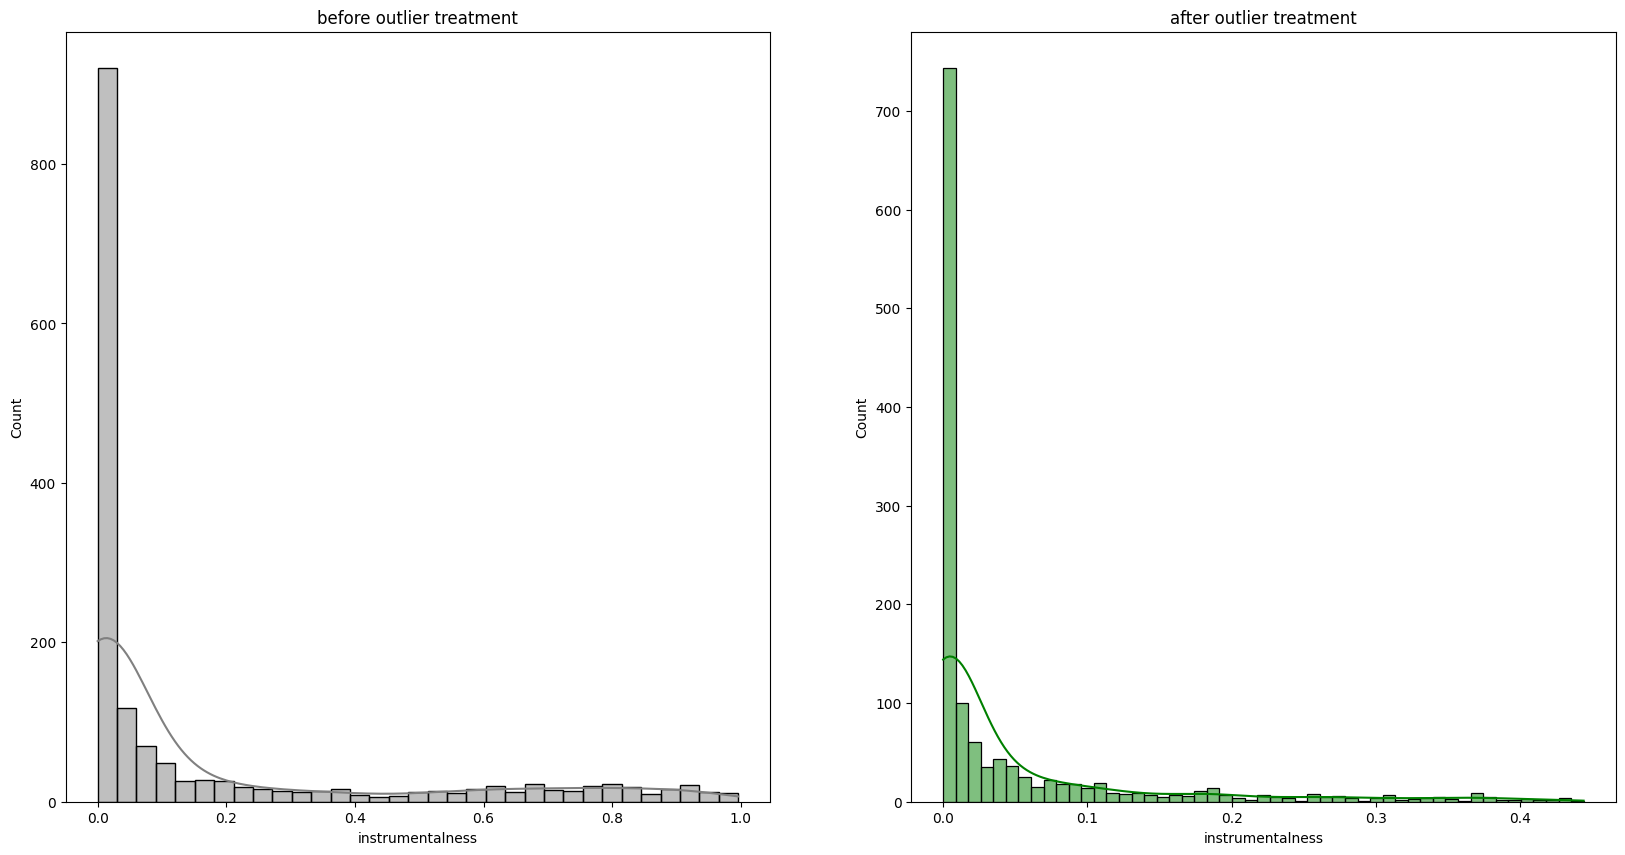

In [157]:
fig, axs = plt.subplots(ncols=2,nrows=1,figsize=(20,10))

sns.histplot(df['instrumentalness'], kde=True, color='grey', ax=axs[0])
sns.histplot(df_no_outliers['instrumentalness'], kde=True, color='green', ax=axs[1])
axs[0].set_title('before outlier treatment')
axs[1].set_title('after outlier treatment')


## Perform exploratory data analysis and feature engineering

- Utilize suitable visualizations to identify the two albums that should be recommended to anyone based on the number of popular songs in each album
- Conduct exploratory data analysis to delve into various features of songs, aiming to identify patterns
- Examine the relationship between a song's popularity and various factors, exploring how this correlation has evolved
- Provide insights on the significance of dimensionality reduction techniques. Share your ideas and elucidate your observations

In [158]:
grouped = df.groupby(['album'])

popular_album = grouped.mean('popularity')

popular_album.head()

,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
album,,,,,,,,,,,,
12 X 5,6.5,0.203860,0.489833,0.610583,0.132789,0.199467,-10.213750,0.050592,146.525500,0.704000,32.083333,160924.083333
12 x 5,6.5,0.204471,0.503833,0.620583,0.128532,0.204358,-10.209417,0.048075,138.563833,0.689917,5.000000,160966.333333
A Bigger Bang (2009 Re-Mastered),8.5,0.124700,0.554625,0.838437,0.000865,0.280119,-3.924500,0.056500,110.398562,0.602750,27.062500,240981.375000
A Bigger Bang (Live),11.5,0.398091,0.334227,0.948318,0.431331,0.896455,-5.163318,0.120355,127.225091,0.253482,18.181818,310597.818182
Aftermath,6.0,0.271906,0.594182,0.609182,0.084479,0.207373,-12.569273,0.050855,125.360000,0.684818,43.090909,233951.090909


In [159]:
popular_album.shape

(90, 12)

In [160]:
popular_album2 = popular_album[['popularity']]

popular_album2.head()

,popularity
album,
12 X 5,32.083333
12 x 5,5.000000
A Bigger Bang (2009 Re-Mastered),27.062500
A Bigger Bang (Live),18.181818
Aftermath,43.090909


In [161]:
popular_album2.sort_values(by=['popularity'], ascending=False)

,popularity
album,
Sticky Fingers (Remastered),53.300000
Some Girls,48.100000
Tattoo You (2009 Re-Mastered),46.454545
Exile On Main Street (2010 Re-Mastered),44.166667
Beggars Banquet (50th Anniversary Edition),43.700000
...,...
On Air,3.722222
Now!,3.666667
Out Of Our Heads (UK Sequence),2.583333


In [162]:
popular_album2.reset_index()

,album,popularity
0,12 X 5,32.083333
1,12 x 5,5.000000
2,A Bigger Bang (2009 Re-Mastered),27.062500
3,A Bigger Bang (Live),18.181818
4,Aftermath,43.090909
...,...,...
85,Undercover,18.000000
86,Undercover (2009 Re-Mastered),25.100000
87,Voodoo Lounge (Remastered 2009),34.000000
88,Voodoo Lounge Uncut (Live),11.678571


### Observation

- 'album' '12 x 5' and '12 X 5' have a difference in capitolization of 'x' but are the same album

### Question
- why can't I make the chart below bigger so I can see the album names?

<Figure size 2000x3000 with 0 Axes>

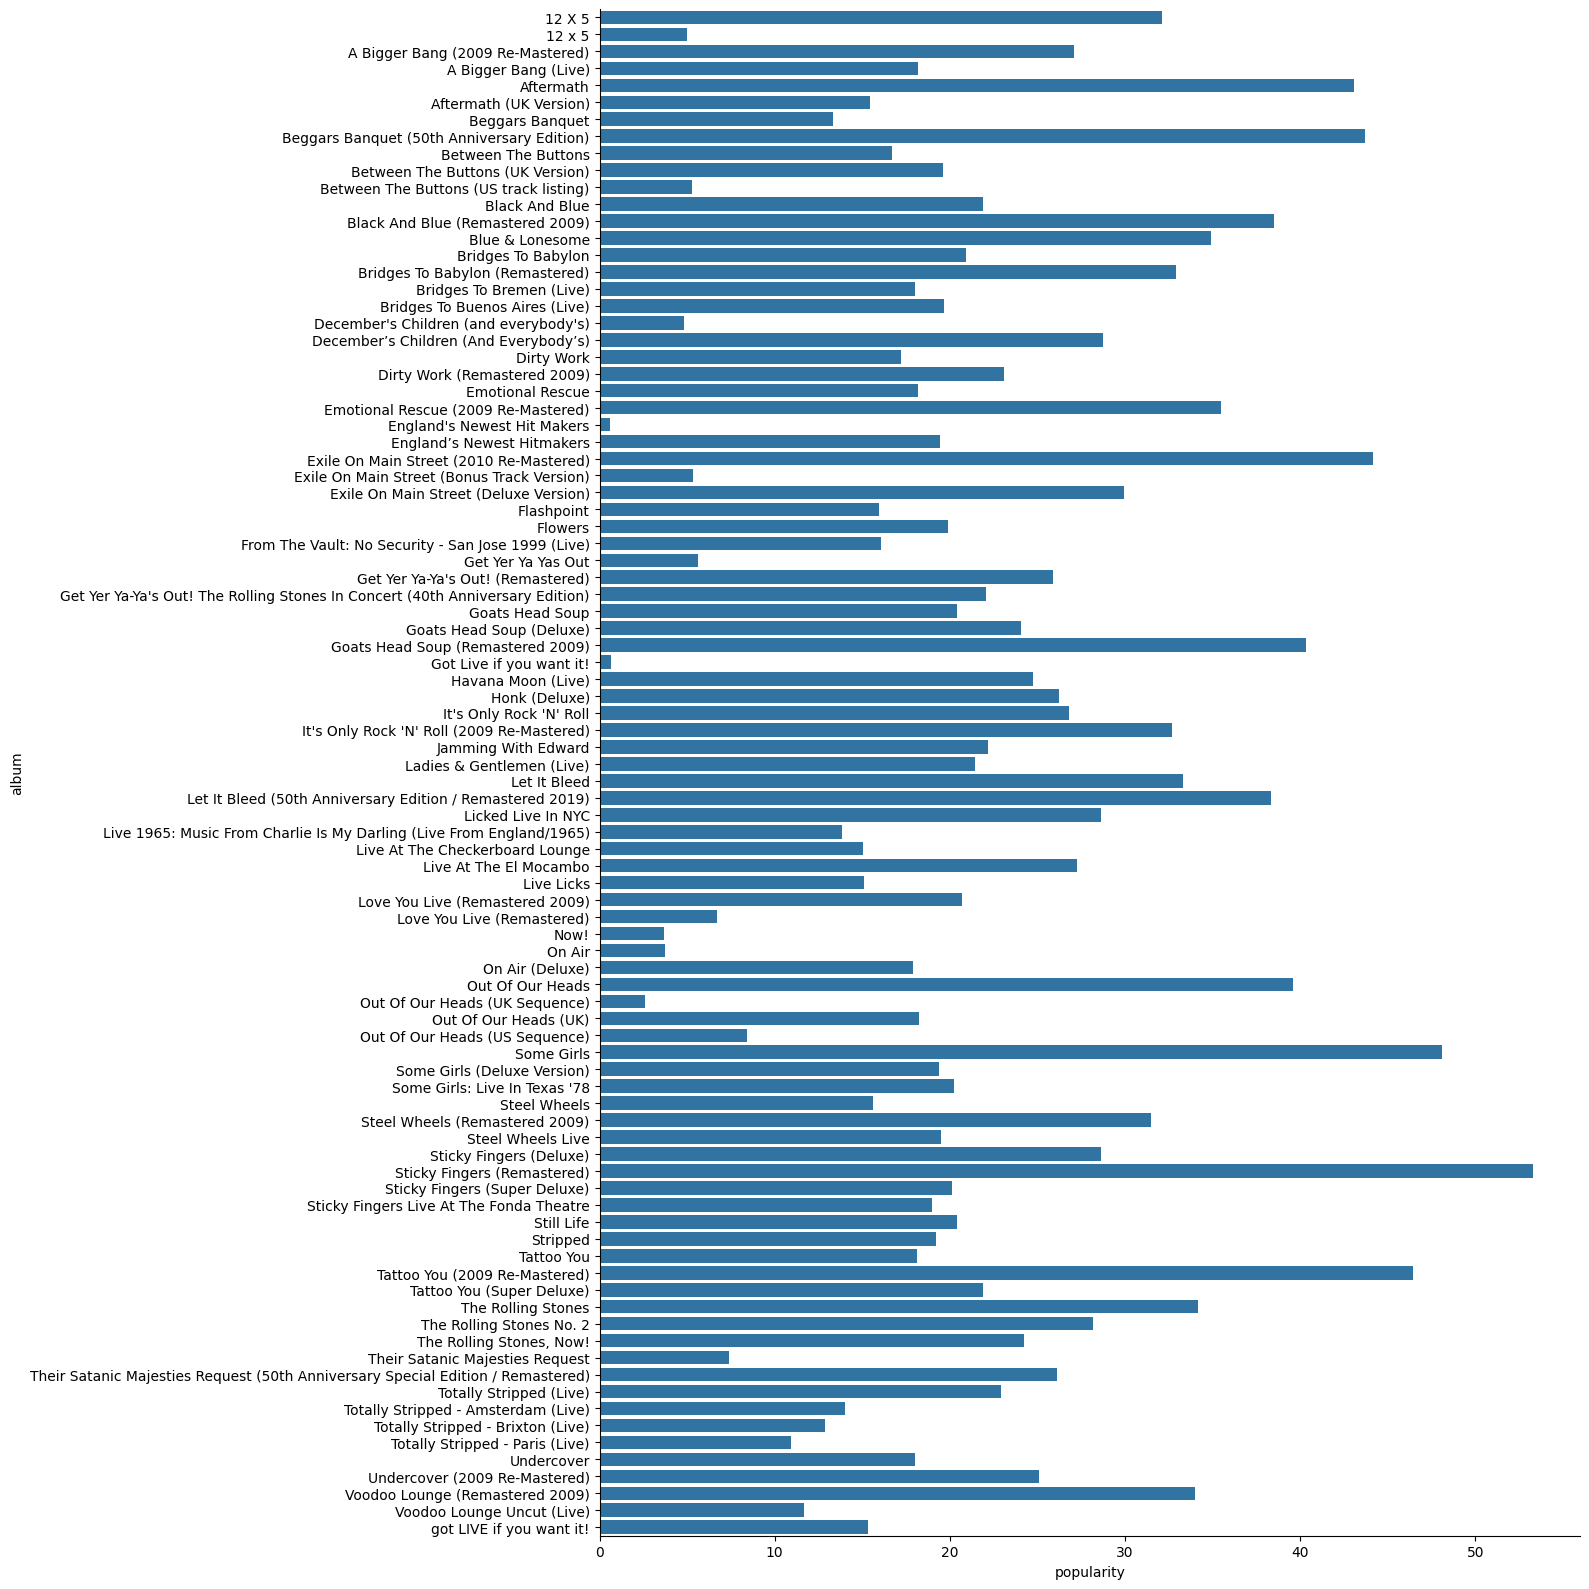

In [163]:
plt.figure(figsize=(20,30))
sns.catplot(data=popular_album2, x="popularity", y="album", kind="bar", height=16, aspect=1)

In [164]:
%matplotlib inline

### Observation

- The 2 most popular albums that should be recommended based on mean popularity to anyone are 'Sticky Fingers (Remastered)' and 'Some Girls'
- The albums with the top most popular songs are 'Aftermath' with the song 'Paint It, Black'; or any of these albums with the next most popular songs 'Let It Bleed', 'Out Of Our Heads', or 'Tattoo You (2009 Re-Mastered)'
- There apppear to be some duplicate albums

In [165]:
mask = df['popularity'] > 65
popular_song = df[mask]
popular_song

,name,album,release_date,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
862,Start Me Up - Remastered 2009,Tattoo You (2009 Re-Mastered),1981-08-24,1,0.0436,0.631,0.932,0.137000,0.0918,-4.142,0.0354,122.429,0.971,76,213066
893,Miss You - Remastered,Some Girls,1978-06-09,1,0.4430,0.795,0.710,0.021500,0.3440,-4.746,0.0392,109.689,0.845,69,288666
901,Beast Of Burden - Remastered 1994,Some Girls,1978-06-09,9,0.3900,0.783,0.878,0.000778,0.0426,-3.864,0.0308,100.626,0.885,72,265173
1023,Angie,Goats Head Soup (Remastered 2009),1973-08-31,5,0.6700,0.429,0.554,0.000152,0.1050,-6.128,0.0291,136.302,0.407,71,272000
1120,Brown Sugar - 2009 Remaster,Sticky Fingers (Remastered),1971-04-23,1,0.2190,0.633,0.934,0.000210,0.0592,-3.594,0.0344,128.606,0.963,66,228666
1122,Wild Horses - 2009 Mix,Sticky Fingers (Remastered),1971-04-23,3,0.6870,0.432,0.389,0.010700,0.0788,-6.517,0.0255,139.506,0.158,69,341773
1248,Gimme Shelter,Let It Bleed,1969-12-05,1,0.4470,0.634,0.630,0.039000,0.1700,-8.277,0.0310,118.628,0.489,76,270773
1256,You Can't Always Get What You Want,Let It Bleed,1969-12-05,9,0.6400,0.320,0.620,0.000064,0.2530,-9.686,0.0594,86.327,0.472,67,448720
1257,Sympathy For The Devil - 50th Anniversary Edition,Beggars Banquet (50th Anniversary Edition),1968-12-06,1,0.5180,0.702,0.668,0.000000,0.0588,-9.237,0.2140,116.063,0.561,73,378146
1403,"Paint It, Black",Aftermath,1966-04-15,1,0.0493,0.464,0.795,0.002440,0.3990,-9.267,0.0926,158.691,0.612,80,202266


In [166]:
popular_song.shape

(11, 15)

### Questions
- What's the best way to explore the features that contribute to the most popular songs?
- How to show these features over time?

### Notes

- build scatter plots using popularity & features like loudness, leave out names
- split by decade, build column use cut function to make 10 year bins, repeat scatterplot for accousticness etc.

In [167]:
# create a year feature

df['release_year']= df['release_date'].str[0:4]
df['release_year']

0       2022
1       2022
2       2022
3       2022
4       2022
        ... 
1605    1964
1606    1964
1607    1964
1608    1964
1609    1964
Name: release_year, Length: 1610, dtype: object

In [168]:
df['release_year'] = df['release_year'].astype(int)

In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1610 entries, 0 to 1609
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              1610 non-null   object 
 1   album             1610 non-null   object 
 2   release_date      1610 non-null   object 
 3   track_number      1610 non-null   int64  
 4   acousticness      1610 non-null   float64
 5   danceability      1610 non-null   float64
 6   energy            1610 non-null   float64
 7   instrumentalness  1610 non-null   float64
 8   liveness          1610 non-null   float64
 9   loudness          1610 non-null   float64
 10  speechiness       1610 non-null   float64
 11  tempo             1610 non-null   float64
 12  valence           1610 non-null   float64
 13  popularity        1610 non-null   int64  
 14  duration_ms       1610 non-null   int64  
 15  release_year      1610 non-null   int64  
dtypes: float64(9), int64(4), object(3)
memory 

In [170]:
df['release_decade'] = pd.cut(x=df['release_year'], bins=[1960, 1969, 1979, 1989, 1999, 2009, 2019, 2023], labels=['1960s','1970s','1980s', '1990s', '2000s', '2010s','2020s'])


In [171]:
df

,name,album,release_date,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms,release_year,release_decade
0,Concert Intro Music - Live,Licked Live In NYC,2022-06-10,1,0.0824,0.463,0.993,0.996000,0.9320,-12.913,0.1100,118.001,0.0302,33,48640,2022,2020s
1,Street Fighting Man - Live,Licked Live In NYC,2022-06-10,2,0.4370,0.326,0.965,0.233000,0.9610,-4.803,0.0759,131.455,0.3180,34,253173,2022,2020s
2,Start Me Up - Live,Licked Live In NYC,2022-06-10,3,0.4160,0.386,0.969,0.400000,0.9560,-4.936,0.1150,130.066,0.3130,34,263160,2022,2020s
3,If You Can't Rock Me - Live,Licked Live In NYC,2022-06-10,4,0.5670,0.369,0.985,0.000107,0.8950,-5.535,0.1930,132.994,0.1470,32,305880,2022,2020s
4,Don’t Stop - Live,Licked Live In NYC,2022-06-10,5,0.4000,0.303,0.969,0.055900,0.9660,-5.098,0.0930,130.533,0.2060,32,305106,2022,2020s
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1605,Carol,The Rolling Stones,1964-04-16,8,0.1570,0.466,0.932,0.006170,0.3240,-9.214,0.0429,177.340,0.9670,39,154080,1964,1960s
1606,Tell Me,The Rolling Stones,1964-04-16,9,0.0576,0.509,0.706,0.000002,0.5160,-9.427,0.0843,122.015,0.4460,36,245266,1964,1960s
1607,Can I Get A Witness,The Rolling Stones,1964-04-16,10,0.3710,0.790,0.774,0.000000,0.0669,-7.961,0.0720,97.035,0.8350,30,176080,1964,1960s
1608,You Can Make It If You Try,The Rolling Stones,1964-04-16,11,0.2170,0.700,0.546,0.000070,0.1660,-9.567,0.0622,102.634,0.5320,27,121680,1964,1960s


<Figure size 2000x3000 with 0 Axes>

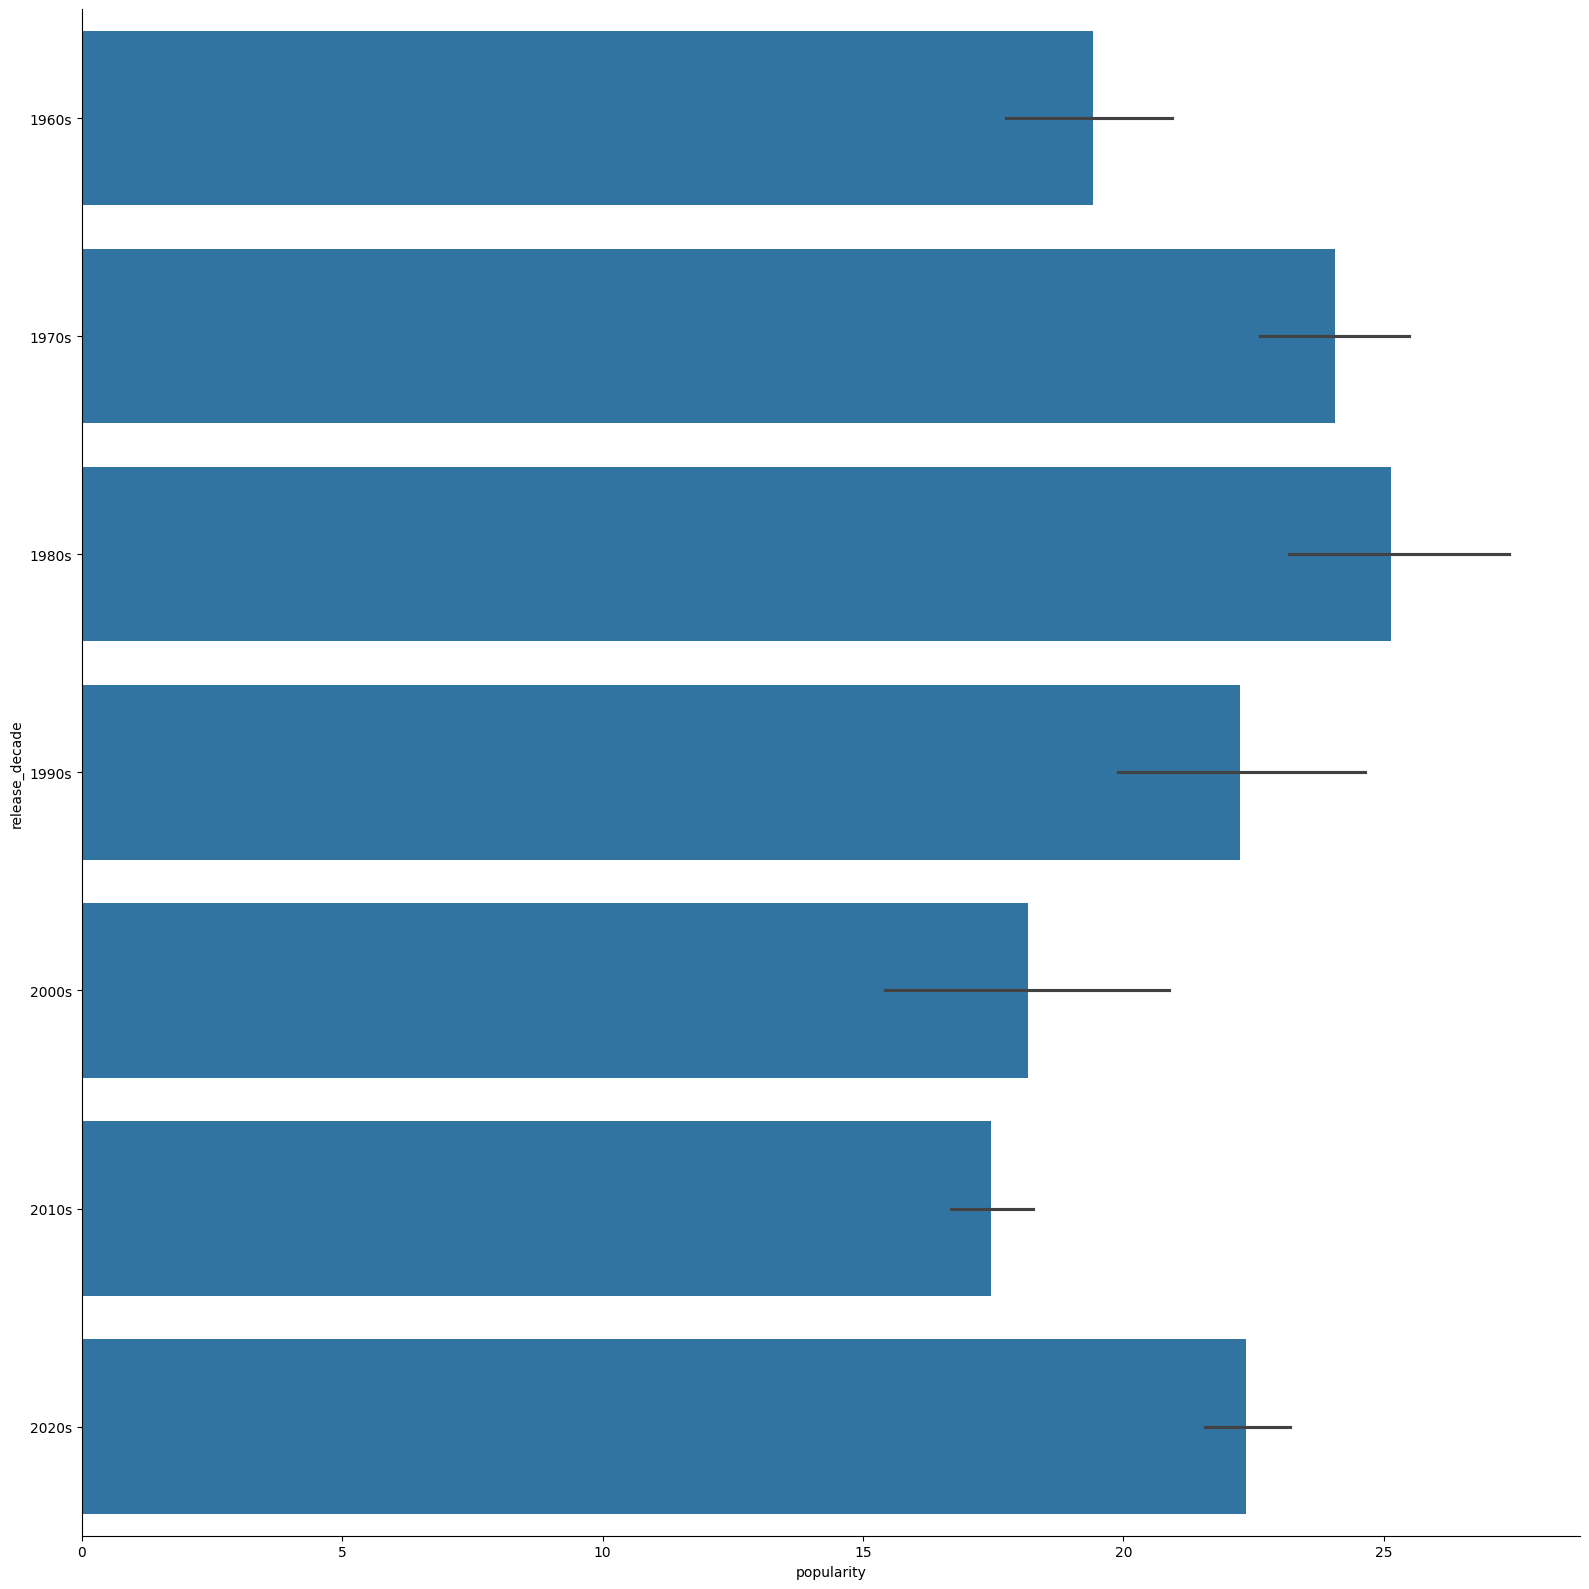

In [172]:
# display popularity by year

plt.figure(figsize=(20,30))
sns.catplot(data=df, x="popularity", y="release_decade", kind="bar", height=16, aspect=1)

### Observations

- The 1980s was the decade most popular songs

<Axes: xlabel='popularity', ylabel='loudness'>

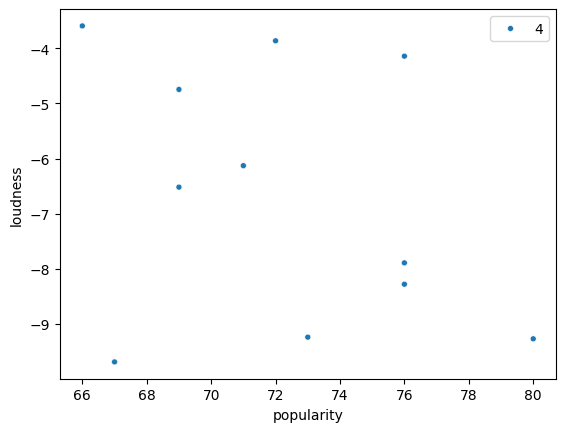

In [173]:
sns.scatterplot(data=popular_song,x='popularity', y='loudness', size=4)

<Axes: xlabel='popularity', ylabel='acousticness'>

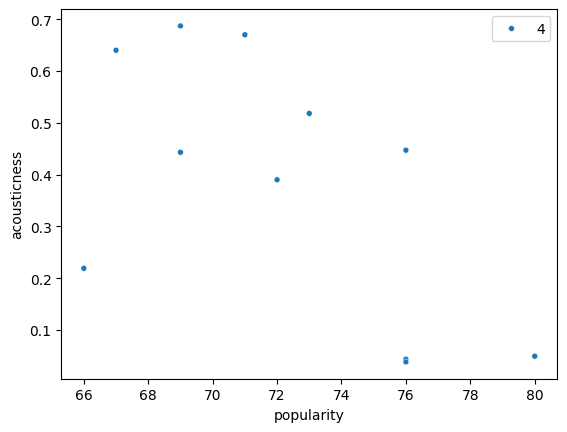

In [174]:
sns.scatterplot(data=popular_song,x='popularity', y='acousticness', size=4)

In [175]:
corr_matrix = df.corr(numeric_only=True)
corr_matrix

,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms,release_year
track_number,1.000000,-0.035675,-0.112004,0.096314,-0.002772,0.188351,0.100835,0.040617,-0.023934,-0.104567,-0.145115,0.156455,0.362922
acousticness,-0.035675,1.000000,0.070017,-0.363819,0.061403,-0.117739,-0.237083,-0.021774,-0.171003,-0.138803,0.108046,0.039128,-0.161193
danceability,-0.112004,0.070017,1.000000,-0.300536,-0.031812,-0.516387,-0.249406,-0.322684,-0.324398,0.546210,0.141205,-0.220045,-0.353826
energy,0.096314,-0.363819,-0.300536,1.000000,0.120261,0.511188,0.698039,0.417214,0.201885,0.046217,-0.057272,0.148876,0.404659
instrumentalness,-0.002772,0.061403,-0.031812,0.120261,1.000000,0.008873,0.012524,0.009586,0.010961,0.103480,-0.010612,-0.137599,-0.062964
liveness,0.188351,-0.117739,-0.516387,0.511188,0.008873,1.000000,0.327036,0.400018,0.108855,-0.347451,-0.205845,0.304735,0.518306
loudness,0.100835,-0.237083,-0.249406,0.698039,0.012524,0.327036,1.000000,0.189904,0.112837,-0.027571,0.156323,0.221558,0.399270
speechiness,0.040617,-0.021774,-0.322684,0.417214,0.009586,0.400018,0.189904,1.000000,0.192687,-0.399751,-0.136745,0.114546,0.306888
tempo,-0.023934,-0.171003,-0.324398,0.201885,0.010961,0.108855,0.112837,0.192687,1.000000,0.000558,-0.061061,0.001465,0.030876
valence,-0.104567,-0.138803,0.546210,0.046217,0.103480,-0.347451,-0.027571,-0.399751,0.000558,1.000000,0.065333,-0.244833,-0.300661


<Axes: >

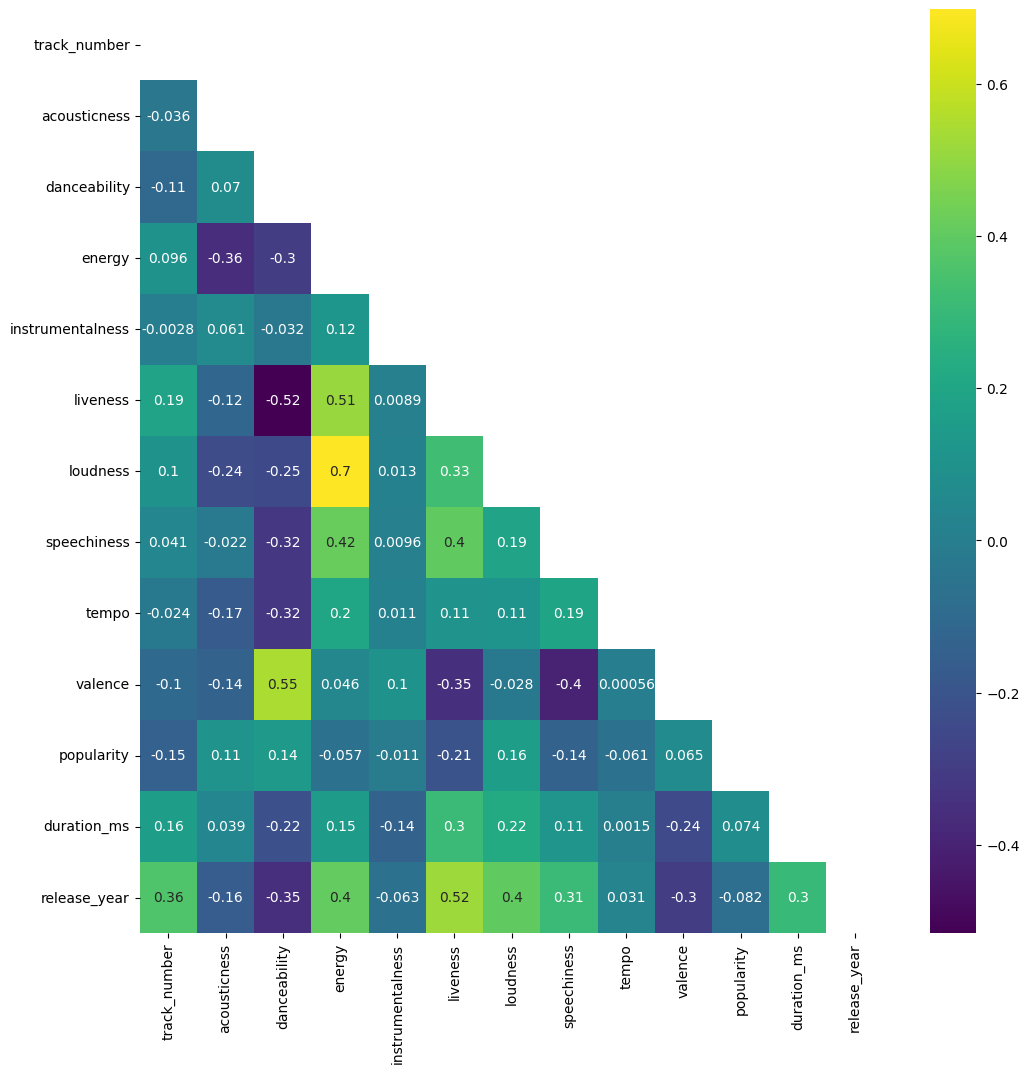

In [176]:
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

fig = plt.figure(figsize=(12,12))

sns.heatmap(corr_matrix, mask=mask, cmap='viridis', annot=True)

### Observations

- 'popularity' is more positively correlated with 'loudness', 'acousticness', and 'danceability'; it is negatively correlated with 'liveness', 'speechiness', and 'track_number'
- 'popularity' has low correlation with 'engergy', 'tempo', 'intrumentalness' and 'valence'
- We can remove the low correlation features to reduce number of features and get better results.

In [177]:
df.drop(columns=['energy', 'tempo', 'instrumentalness', 'valence'], inplace=True)
df

,name,album,release_date,track_number,acousticness,danceability,liveness,loudness,speechiness,popularity,duration_ms,release_year,release_decade
0,Concert Intro Music - Live,Licked Live In NYC,2022-06-10,1,0.0824,0.463,0.9320,-12.913,0.1100,33,48640,2022,2020s
1,Street Fighting Man - Live,Licked Live In NYC,2022-06-10,2,0.4370,0.326,0.9610,-4.803,0.0759,34,253173,2022,2020s
2,Start Me Up - Live,Licked Live In NYC,2022-06-10,3,0.4160,0.386,0.9560,-4.936,0.1150,34,263160,2022,2020s
3,If You Can't Rock Me - Live,Licked Live In NYC,2022-06-10,4,0.5670,0.369,0.8950,-5.535,0.1930,32,305880,2022,2020s
4,Don’t Stop - Live,Licked Live In NYC,2022-06-10,5,0.4000,0.303,0.9660,-5.098,0.0930,32,305106,2022,2020s
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1605,Carol,The Rolling Stones,1964-04-16,8,0.1570,0.466,0.3240,-9.214,0.0429,39,154080,1964,1960s
1606,Tell Me,The Rolling Stones,1964-04-16,9,0.0576,0.509,0.5160,-9.427,0.0843,36,245266,1964,1960s
1607,Can I Get A Witness,The Rolling Stones,1964-04-16,10,0.3710,0.790,0.0669,-7.961,0.0720,30,176080,1964,1960s
1608,You Can Make It If You Try,The Rolling Stones,1964-04-16,11,0.2170,0.700,0.1660,-9.567,0.0622,27,121680,1964,1960s


## Perform cluster analysis

- Identify the right number of clusters
- Use appropriate clustering algorithms
- Define each cluster based on the features

In [179]:

df_sub = df[['acousticness',
       'danceability', 'liveness', 'loudness',
       'speechiness', 'popularity', 'duration_ms']]

In [180]:
# build a list of k values
k_values = range(1,11)

# build a list of WCSS calc - empty at first then we append values
wcss_list = []

for k in k_values:
    #build KMeans model based on each k value
    KM = KMeans(n_clusters=k)
    KM.fit(df_sub)

    #calculate and append WCSS values
    wcss_value = KM.inertia_
    wcss_list.append(wcss_value)

    print('k value of', k, '|', 'WCSS value:', wcss_value)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


k value of 1 | WCSS value: 18883452400608.133
k value of 2 | WCSS value: 8605293188186.607


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


k value of 3 | WCSS value: 4348744373610.7026


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


k value of 4 | WCSS value: 2520911456533.5


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


k value of 5 | WCSS value: 1707746571657.976


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


k value of 6 | WCSS value: 1268387017490.3506


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


k value of 7 | WCSS value: 953845080353.319


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


k value of 8 | WCSS value: 749857788236.9285


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


k value of 9 | WCSS value: 601623629427.446


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


k value of 10 | WCSS value: 497667561119.4376


([<matplotlib.axis.XTick at 0x2d3238290>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10')])

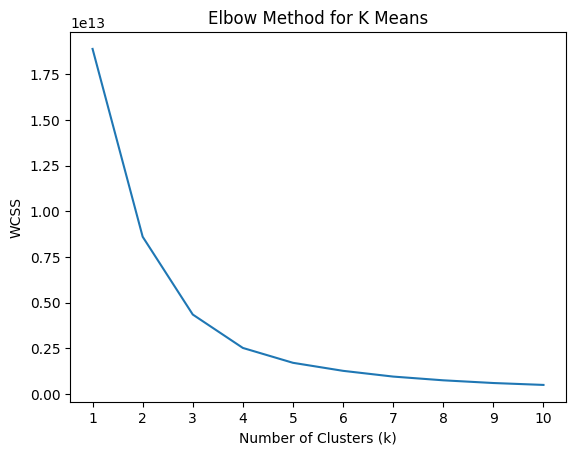

In [181]:
plt.plot(k_values, wcss_list)
plt.title('Elbow Method for K Means')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.xticks(k_values)

### Observation
Based on the elbow method visualization the optimal number of cluseters is around 6.

In [182]:
# perfor KMeans with 6 clusters
KM = KMeans(n_clusters=6, random_state=1)

In [183]:
df_sub['Clusters'] = KM.fit_predict(df_sub[['acousticness','popularity']])

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/x6/rw23hkp16k3bq3_s0frsrx280000gn/T/ipykernel_47656/3687149615.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub['Clusters'] = KM.fit_predict(df_sub[['acousticness','popularity']])


In [184]:
centroids = KM.cluster_centers_
print(centroids)

[[ 0.2459982   4.28813559]
 [ 0.22712561 22.18655098]
 [ 0.31851754 41.26950355]
 [ 0.23436184 14.95294118]
 [ 0.351296   61.31428571]
 [ 0.27343827 30.26086957]]


In [185]:
cen_X = list(centroids[:,0])
cen_X

[0.2459982034237288,
 0.22712561171366594,
 0.31851753900709223,
 0.23436183609411765,
 0.351296,
 0.2734382652173913]

In [186]:
cen_Y = list(centroids[:,1])
cen_Y

[4.288135593220346,
 22.186550976138825,
 41.26950354609929,
 14.952941176470588,
 61.3142857142857,
 30.260869565217398]

In [191]:
df_sub['cen_X'] = df_sub['Clusters'].map({0:cen_X[0],
                                1:cen_X[1],
                                2:cen_X[2],
                                3:cen_X[3],
                                4:cen_X[4],
                                5:cen_X[5]})

df_sub['cen_Y'] = df_sub['Clusters'].map({0:cen_Y[0],
                                1:cen_Y[1],
                                2:cen_Y[2],
                                3:cen_Y[3],
                                4:cen_Y[4],
                                5:cen_Y[5]})

df_sub.head()

/var/folders/x6/rw23hkp16k3bq3_s0frsrx280000gn/T/ipykernel_47656/1112917365.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub['cen_X'] = df_sub['Clusters'].map({0:cen_X[0],
/var/folders/x6/rw23hkp16k3bq3_s0frsrx280000gn/T/ipykernel_47656/1112917365.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub['cen_Y'] = df_sub['Clusters'].map({0:cen_Y[0],


,acousticness,danceability,liveness,loudness,speechiness,popularity,duration_ms,Clusters,cen_X,cen_Y,Colors
0,0.0824,0.463,0.932,-12.913,0.1100,33,48640,5,0.273438,30.26087,NaN
1,0.4370,0.326,0.961,-4.803,0.0759,34,253173,5,0.273438,30.26087,NaN
2,0.4160,0.386,0.956,-4.936,0.1150,34,263160,5,0.273438,30.26087,NaN
3,0.5670,0.369,0.895,-5.535,0.1930,32,305880,5,0.273438,30.26087,NaN
4,0.4000,0.303,0.966,-5.098,0.0930,32,305106,5,0.273438,30.26087,NaN


In [192]:
colors = ['#c32700', '#d67524', '#d67524', '#83d6bb', '#c7ae88', '#901b1b' ]
df_sub['Colors'] = df_sub['Clusters'].map({0:colors[0],
                                   1:colors[1],
                                   2:colors[2],
                                   3:colors[3],
                                   4:colors[4],
                                   5:colors[5]})

df_sub.head()

/var/folders/x6/rw23hkp16k3bq3_s0frsrx280000gn/T/ipykernel_47656/1221282136.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub['Colors'] = df_sub['Clusters'].map({0:colors[0],


,acousticness,danceability,liveness,loudness,speechiness,popularity,duration_ms,Clusters,cen_X,cen_Y,Colors
0,0.0824,0.463,0.932,-12.913,0.1100,33,48640,5,0.273438,30.26087,#901b1b
1,0.4370,0.326,0.961,-4.803,0.0759,34,253173,5,0.273438,30.26087,#901b1b
2,0.4160,0.386,0.956,-4.936,0.1150,34,263160,5,0.273438,30.26087,#901b1b
3,0.5670,0.369,0.895,-5.535,0.1930,32,305880,5,0.273438,30.26087,#901b1b
4,0.4000,0.303,0.966,-5.098,0.0930,32,305106,5,0.273438,30.26087,#901b1b


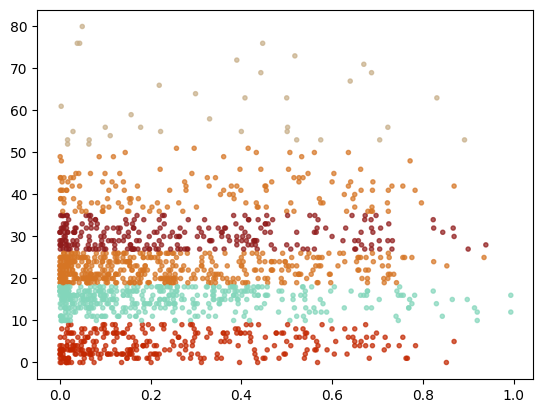

In [193]:
plt.scatter(df_sub['acousticness'], df_sub['popularity'], c=df_sub['Colors'], alpha=0.7, s=9)